# Map of GEOTRACES river sampling locations

In [15]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import pandas as pd
import csv
import pickle

%matplotlib notebook

### Load relevant data:

Bathymetry:

In [3]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [4]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [5]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Model river runoffs:

In [6]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/runoff_core_monthly_y2002.nc','r')
lon_rf = c.variables['nav_lon']
lat_rf = c.variables['nav_lat']
socoefr = c.variables['socoefr']
rf = c.variables['runoff'][0]

In [7]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)

In [8]:
rf = np.ma.masked_where(rf == 0.0, rf)
lon_rf = np.ma.masked_where(rf == 0.0, lon_rf)
lat_rf = np.ma.masked_where(rf == 0.0, lat_rf)

River station locations:

In [24]:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    CAA_data = csv.reader(ifile)
    lon_sta = []
    lat_sta = []
    sta_names = []
    
    i = 0
    for row in CAA_data:
        i += 1
        if i < 3:
            i == 2
        else:
            sta_names.append(str(row[1]))
            lat_sta.append(float(row[2]))
            lon_sta.append(float(row[3]))
    return sta_names, lat_sta, lon_sta

f1 = '/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/rivers/CAA_dissolved_rivers.csv'

sta_names, lat_sta, lon_sta = read_csv(f1)

### Map with river station names connected with lines

In [25]:
sta_names = ['Black Cliffs', 'Glacier', 'Marcil Creek ', 'Saaqu', 'Devon Island', 'Cunningham', \
             'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', 'Pasley', 'Simpson', \
             'Ellice', 'Tree']

In [26]:
adjust_lon = np.array([0,-1,0,-5.5,-5,-13, \
                       -4.5,-12,0,-9.5,-2,-1,\
                       -2,-2])
adjust_lat = np.array([0.85,-1.0,-1.6,-0.65,1.6,-1.15 \
                       ,1.40,0.95,-1.1,-1.3,-0.7,-0.8, \
                       -0.9,-0.9])

text_lat = lat_sta + adjust_lat
text_lon = lon_sta + adjust_lon

In [27]:
text2_lat = [74.16375, 72.8124, 71.79706, 73.44355, 75.681, 73.4653, \
             75.12447, 75.6926, 72.14905, 71.81122, 70.46961, 67.67628, \
             67.89301, 67.62417] 
text2_lon = [-77.44678, -77.1995, -83.98643, -88.48292, -87.191, -96.6242,\
             -92.9369, -99.77833, -92.41615, -97.01716, -95.57955, -100.56831,\
             -104.07575, -111.91609] 

In [28]:
features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Baffin Bay', 'Nunavut', \
           'Northwest','Territories']

In [29]:
lon_features = [-145, -125, -54, -54, -72, -108, -133, -132]
lat_features = [74, 84, 79.5, 78.5, 72.5, 66, 67, 66.5]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: Matplo

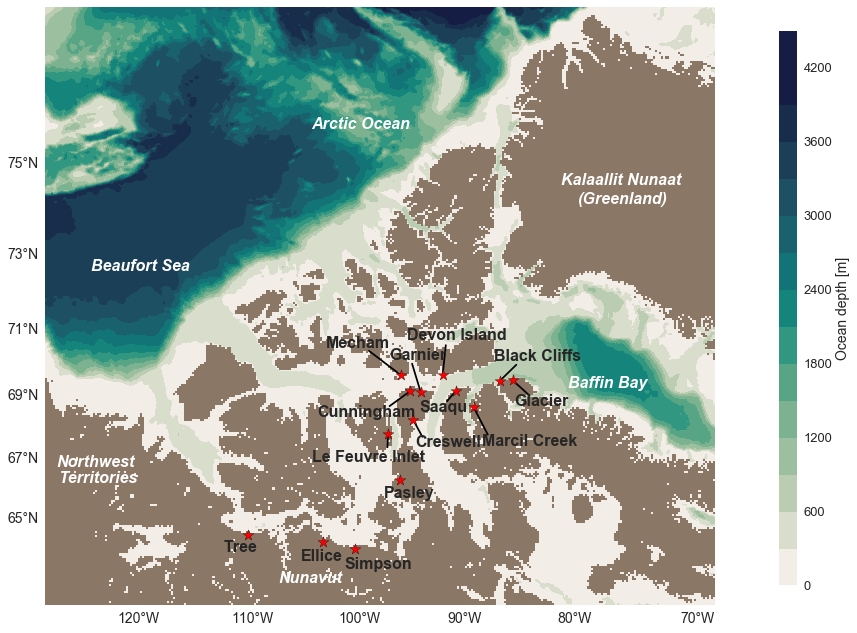

In [34]:
fig,ax = plt.subplots(figsize=(12,11))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -98, resolution='i', width=3.0e6, height=2.68e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=2)

# bathymetry:
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,15, cmap=cmocean.cm.tempo, vmin =0 , vmax = 4000, zorder=1)

# river stations:
x_sta, y_sta = proj(lon_sta, lat_sta)
proj.scatter(x_sta, y_sta, marker='*', s=130, c='r', edgecolor='k', zorder=4)

# station names:
text_x, text_y = proj(text_lon, text_lat)
text2_x, text2_y = proj(text2_lon, text2_lat) #lines
for i in range(len(sta_names)):
    plt.text(text_x[i], text_y[i], sta_names[i], fontsize=16, fontweight='bold', zorder=3)
    plt.plot([text2_x[i], x_sta[i]], [text2_y[i], y_sta[i]], '-k', zorder=3)
    
# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic',\
             color='w', zorder=3)

#---------------------
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes)
a = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=13)

## Map of river classification

In [16]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/rivers/river_class_201807.nc','r')

In [17]:
river_class = c.variables['rclass']

In [18]:
regions = ['Normal rivers','Glacial rivers','Continental rivers']
clev = [1,2,3,4]

In [19]:
river_class = np.array(river_class)

In [20]:
features2 = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Baffin Bay']
lon_features2 = [-145, -125, -59, -59, -72]
lat_features2 = [75.3, 84, 79.5, 78.5, 72.9]

<IPython.core.display.Javascript object>


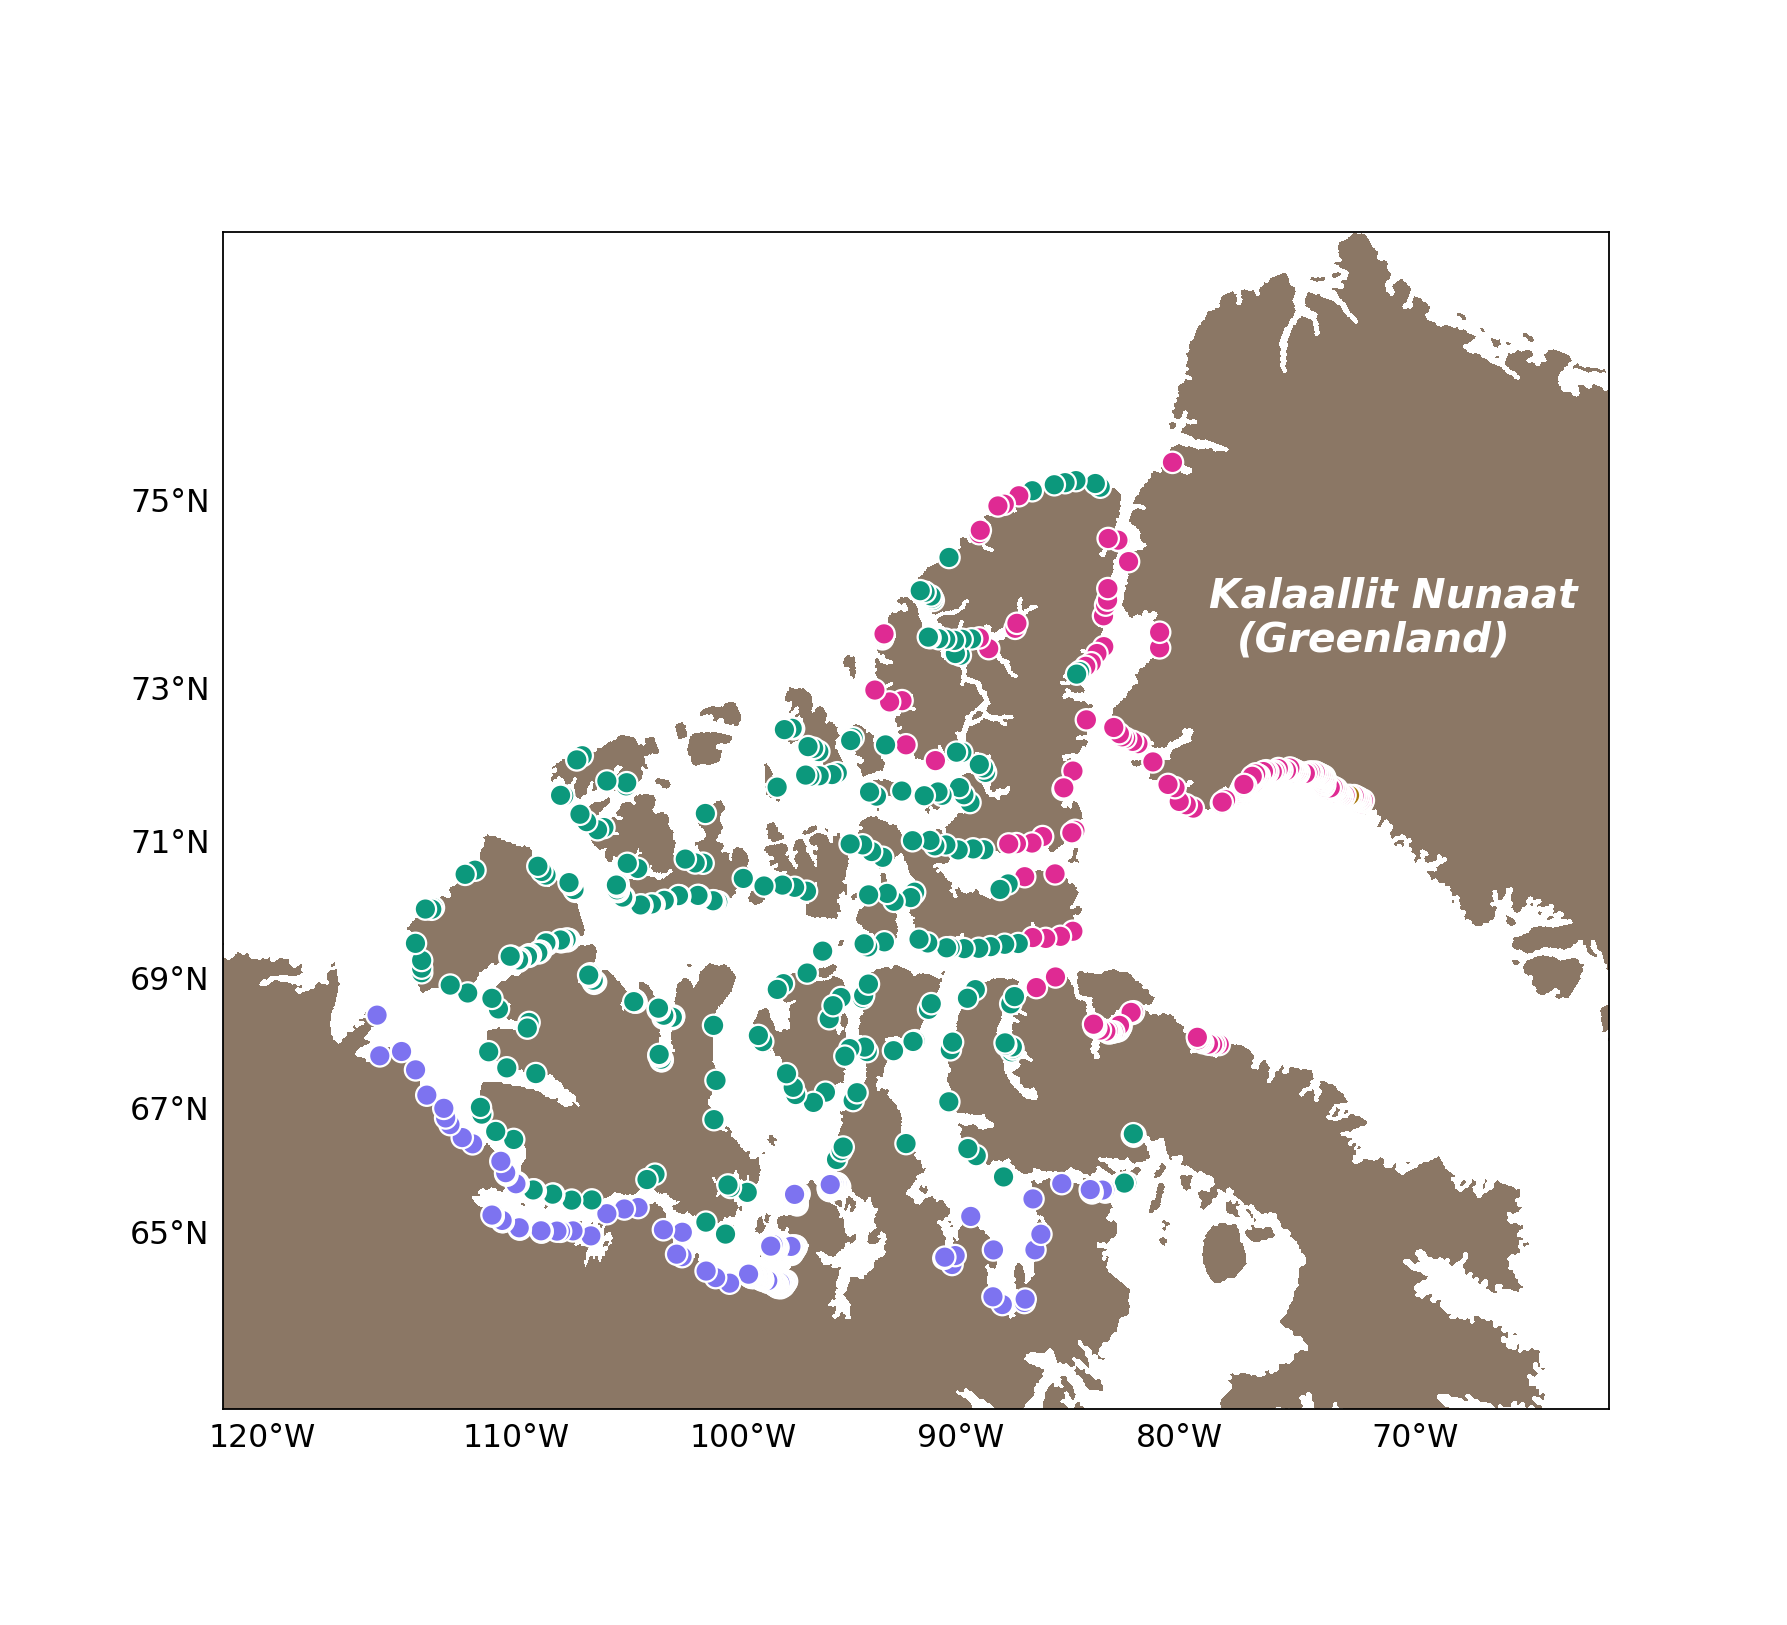

In [39]:
proj=pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle', 'rb'))

# model rivers:
x_rf, y_rf = proj(lon_rf[1480:2050, 200:800], lat_rf[1480:2050, 200:800])
CS1 = proj.contourf(x_rf, y_rf, river_class[1480:2050, 200:800], clev, vmin=1,vmax=4, \
                    cmap=cmocean.cm.phase, zorder=3)
CS = proj.scatter(x_rf, y_rf, c=river_class[1480:2050, 200:800], vmin=0,vmax=4, s=90, \
                  edgecolor='w', cmap=cmocean.cm.phase, label= 'Rivers in model', zorder=3)

# features:
textx2, texty2 = proj(lon_features2, lat_features2)
for i in range(len(features2)):
    plt.text(textx2[i], texty2[i], features2[i], fontsize=18, fontweight='bold',fontstyle='italic', color='w', \
            zorder=4)
    
plt.savefig('/ocean/brogalla/GEOTRACES/figures/riverclass.png', bbox_inches='tight')